In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import signal
from scipy.signal import convolve2d

In [25]:
img=plt.imread("tulips.jpg")
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [26]:
x = 0
y = -1
sigma = 1
v = (1/(2*np.pi*(sigma**2)))*np.exp(-(x**2 + y**2)/(2*(sigma**2)))
v


0.09653235263005391

In [27]:
def karthik_getGaussianKernel(s, sigma):
    maxX = s // 2
    minX = -maxX
    minY = minX
    maxY = maxX
    G = np.zeros((s, s))
    for x in range(minX, maxX + 1):
        for y in range(minY, maxY + 1):
            v = (1 / (2 * np.pi * (sigma ** 2))) * np.exp(-(x ** 2 + y ** 2) / (2 * (sigma ** 2)))
            G[x - minX, y - minY] = v
    return G


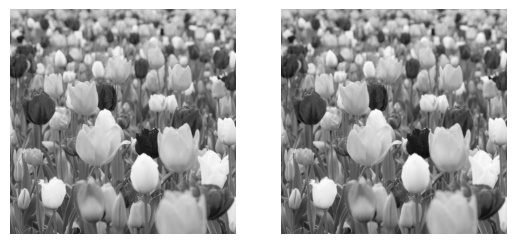

In [28]:
G = karthik_getGaussianKernel(3, 0.5)
img_S = convolve2d(img, G, mode='same', boundary='wrap')  

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_S, cmap='gray')
plt.axis('off')
plt.show()

In [29]:
x=np.zeros((2,1))
x[0]=-1
x[1]=1
x




array([[-1.],
       [ 1.]])

In [30]:
y=np.zeros((1,2))
y[0][0]=-1
y[0][1]=1
y

array([[-1.,  1.]])

In [31]:
Ix=signal.convolve2d(img_S,x, boundary = 'symm',mode = 'same')
Iy=signal.convolve2d(img_S,y, boundary = 'symm',mode = 'same')

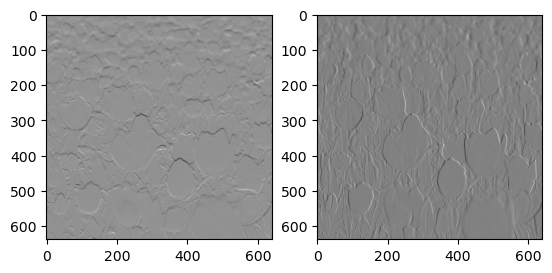

In [32]:
plt.subplot(121)
plt.imshow(Ix,cmap='gray')
plt.subplot(122)
plt.imshow(Iy,cmap='gray')
plt.show()

In [33]:
GM = (Ix**2 + Iy**2)**0.5
ED =np.rad2deg(np.arctan2(Iy,Ix))

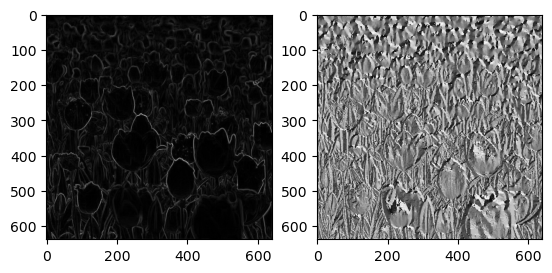

In [34]:
plt.subplot(121)
plt.imshow(GM,cmap='gray')
plt.subplot(122)
plt.imshow(ED,cmap='gray')
plt.show()

In [35]:
def NMS(Gm, Gd):
    Gd_bin = 45 * (np.round(Gd / 45))
    Gm_NMS = np.zeros(Gm.shape)
    numRows, numCols = Gm.shape[0], Gm.shape[1]
    a, b = 0., 0.
    for r in range(1, numRows - 1):
        for c in range(1, numCols - 1):
            ang = Gd_bin[r, c]
            if ang == 180. or ang == -180. or ang == 0.0 or ang == -0.0:
                a, b = Gm[r - 1, c], Gm[r + 1, c]
            elif ang == 45. or ang == -135.:
                a, b = Gm[r + 1, c + 1], Gm[r - 1, c - 1]
            elif ang == 90. or ang == -90.:
                a, b = Gm[r, c - 1], Gm[r, c + 1]
            elif ang == 135. or ang == -45.:
                a, b = Gm[r - 1, c + 1], Gm[r + 1, c - 1]
            else:
                print('Error')
                return
            if Gm[r, c] >= a and Gm[r, c] >= b:
                Gm_NMS[r, c] = Gm[r, c]
    return Gm_NMS


In [36]:
imgNMS = NMS(GM,ED)

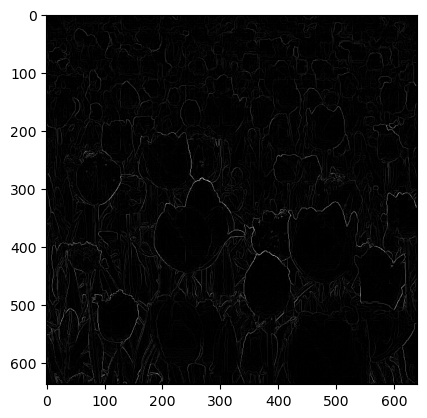

In [37]:
plt.imshow(imgNMS,cmap='gray')


In [38]:
from skimage import filters

In [39]:
L = imgNMS.mean()
H = L + imgNMS.std()
E = filters.apply_hysteresis_threshold(imgNMS,L,H)

In [40]:
imgNMS

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 14.947097  , 14.20915224, ..., 12.18152385,
        12.92784318,  0.        ],
       [ 0.        ,  3.69779228,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  4.4032557 ,  0.        , ...,  2.46435396,
        12.29399853,  0.        ],
       [ 0.        ,  4.52437054,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

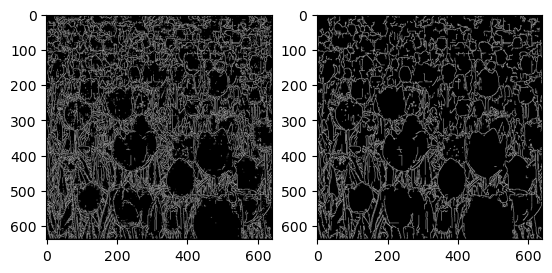

In [41]:
plt.subplot(121)
plt.imshow(imgNMS>5,cmap='gray')
plt.subplot(122)
plt.imshow(E,cmap='gray')
plt.show()
